# Netflix Project
### O intuito desse projeto é entender como estão distribuidos os filmes na plataforma netflix.
### Quais os principais generos? Quais os principais diretores?
### Além disso, entender se existe uma possível correlação entre esses fatores e o score no IMDb

# Importing Libraries and Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [3]:
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


## Basic Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

In [5]:
for cols in df.columns: 
    null_values = np.mean(df[cols].isnull())*100
    print("{} - {}%".format(cols,null_values))

Unnamed: 0 - 0.0%
ID - 0.0%
Title - 0.0%
Year - 0.0%
Age - 43.89910667367315%
IMDb - 2.1650026274303733%
Rotten Tomatoes - 0.07356805044666316%
Netflix - 0.0%
Hulu - 0.0%
Prime Video - 0.0%
Disney+ - 0.0%
Type - 0.0%
Directors - 4.319495533368365%
Genres - 1.2191276931161323%
Country - 2.6694692590646345%
Language - 3.2895428271150813%
Runtime - 3.352601156069364%


### Age have a lot of NaN, so Let's drop it 

In [22]:
df_drop_age = df.copy()
df_drop_age.drop(columns=["Unnamed: 0", "Age"], inplace=True)
df_drop_age.dropna(axis=0, inplace = True)
df_drop_age.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
5,6,To All the Boys I've Loved Before,2018,7.1/10,94/100,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


### Let's fix the IMDb Score and Rotten Tomatoes Score, since they are as object type, and we want them in Float

In [23]:
df_scores = df_drop_age.copy()

df_scores["IMDb"] = df_scores["IMDb"].apply(lambda x:x.split("/")[0])
df_scores["Rotten Tomatoes"] = df_scores["Rotten Tomatoes"].apply(lambda x:x.split("/")[0])
df_scores["IMDb"] = df_scores["IMDb"].astype("float64")
df_scores["Rotten Tomatoes"] = df_scores["Rotten Tomatoes"].astype("int64")

In [24]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8695 entries, 0 to 9496
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8695 non-null   int64  
 1   Title            8695 non-null   object 
 2   Year             8695 non-null   int64  
 3   IMDb             8695 non-null   float64
 4   Rotten Tomatoes  8695 non-null   int64  
 5   Netflix          8695 non-null   int64  
 6   Hulu             8695 non-null   int64  
 7   Prime Video      8695 non-null   int64  
 8   Disney+          8695 non-null   int64  
 9   Type             8695 non-null   int64  
 10  Directors        8695 non-null   object 
 11  Genres           8695 non-null   object 
 12  Country          8695 non-null   object 
 13  Language         8695 non-null   object 
 14  Runtime          8695 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ MB


### So lets supose that the first Genre is the main genre of the film
### Lets supose that the first country is the main country of the film

In [35]:
genres = []

for i in df_scores["Genres"]:
    main_genre = i.split(",")[0]
    genres.append(main_genre)

genres[:10]

['Biography',
 'Action',
 'Documentary',
 'Drama',
 'Comedy',
 'Documentary',
 'Action',
 'Comedy',
 'Drama',
 'Crime']

In [39]:
df_genre = df_scores.copy()
df_genre["Genre"] = genres 
df_genre.drop(columns="Genres", inplace = True)
df_genre.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Country,Language,Runtime,Genre
0,1,The Irishman,2019,7.8,98,1,0,0,0,0,Martin Scorsese,United States,"English,Italian,Latin,Spanish,German",209.0,Biography
1,2,Dangal,2016,8.4,97,1,0,0,0,0,Nitesh Tiwari,"India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,Action
2,3,David Attenborough: A Life on Our Planet,2020,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",United Kingdom,English,83.0,Documentary
3,4,Lagaan: Once Upon a Time in India,2001,8.1,94,1,0,0,0,0,Ashutosh Gowariker,"India,United Kingdom","Hindi,English",224.0,Drama
5,6,To All the Boys I've Loved Before,2018,7.1,94,1,0,0,0,0,Susan Johnson,United States,English,99.0,Comedy


In [40]:
country = []

for i in df_genre["Country"]:
    main_country = i.split(",")[0]
    country.append(main_country)

country[:10]

['United States',
 'India',
 'United Kingdom',
 'India',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'India']

In [45]:
df_country = df_genre.copy()
df_country["Countrys"] = country
df_country.drop(columns=["Language","Country"], inplace = True)
df_country.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Runtime,Genre,Countrys
0,1,The Irishman,2019,7.8,98,1,0,0,0,0,Martin Scorsese,209.0,Biography,United States
1,2,Dangal,2016,8.4,97,1,0,0,0,0,Nitesh Tiwari,161.0,Action,India
2,3,David Attenborough: A Life on Our Planet,2020,9.0,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",83.0,Documentary,United Kingdom
3,4,Lagaan: Once Upon a Time in India,2001,8.1,94,1,0,0,0,0,Ashutosh Gowariker,224.0,Drama,India
5,6,To All the Boys I've Loved Before,2018,7.1,94,1,0,0,0,0,Susan Johnson,99.0,Comedy,United States


# Visualizations

<AxesSubplot:xlabel='Year', ylabel='Count'>

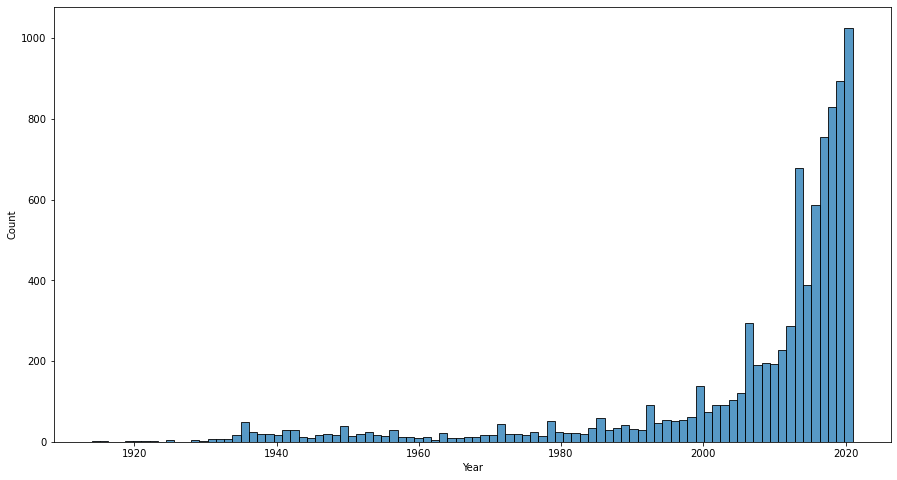

In [50]:

plt.figure(figsize=(15,8))
sns.histplot(x="Year", data = df_country)

### A big part of the films in netflix were produced from 2012 onwards

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Count'>

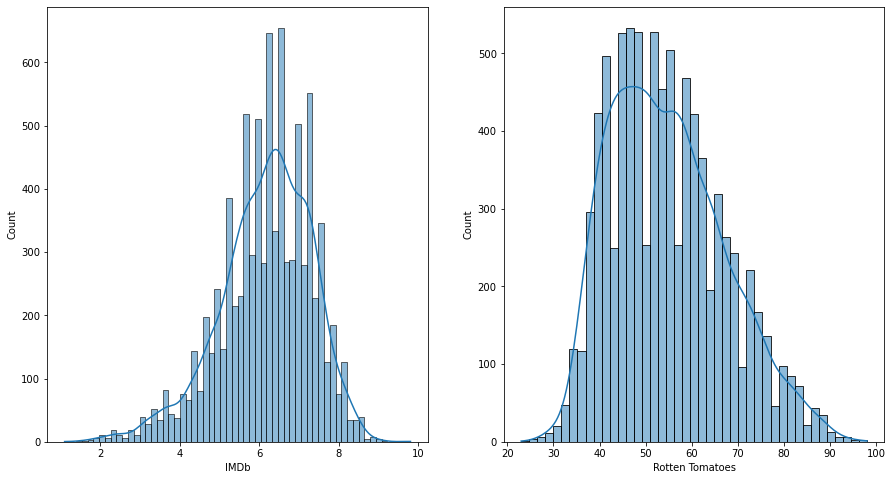

In [60]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8))
sns.histplot(x= "IMDb", data = df_country, kde=True, ax=axs[0], )
sns.histplot(x= "Rotten Tomatoes", data = df_country, kde=True, ax=axs[1],)


### so, the score in IMDb seems to be higher than in Rotten Tomatoes

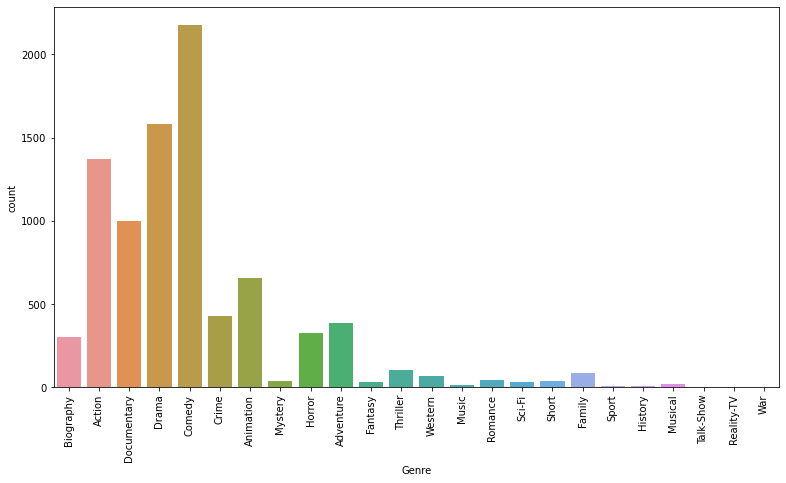

In [69]:
plt.figure(figsize=(13,7))
sns.countplot(x="Genre", data=df_country)
plt.xticks(rotation=90)
plt.show()

### a lot of Comedy, Drama and Action Films

### Now Let's Check the IMDb notes by Directors and by genre

In [86]:
df_country[["IMDb","Directors"]].groupby(by="Directors").agg(["mean","count"]).sort_values(by=("IMDb","mean"), ascending=False)

IMDb      
                          mean count
Directors                           
Jason Docter,Matt Docter  9.80     1
PJ Moynihan               9.20     1
Amadeusz Kocan            9.15     2
Samir Al Asfory           9.00     1
Dennis M. Lynch           9.00     1
...                        ...   ...
Sajid Khan                1.70     1
David Rambaldi            1.60     1
Sasha Burrow              1.50     1
S.A. Zaidi                1.50     1
Jason Wright              1.10     1

[6327 rows x 2 columns]

### As we can see the mean is very affected by the directors thar only produced one film, lets check for director that have produced more than 4 films

In [91]:
directors = df_country[["IMDb","Directors"]].groupby(by="Directors").agg(["mean","count"]).sort_values(by=("IMDb","mean"), ascending=False)
directors[directors[("IMDb","count")]>4].head(10)

IMDb      
                             mean count
Directors                              
Anthony Russo,Joe Russo  7.740000     5
Brad Bird                7.720000     5
Bong Joon Ho             7.620000     5
Alfred Hitchcock         7.620000     5
Tim Gray                 7.550000     6
Martin Scorsese          7.520000    10
Mike Clattenburg         7.440000     5
James Algar              7.350000     8
Youssef Chahine          7.333333     6
Anurag Basu              7.320000     5

In [97]:
genres_imdb = df_country[["IMDb","Genre"]].groupby(by="Genre").mean().sort_values(by="IMDb", ascending=False)
genres_imdb.head(10)


,IMDb
Genre,
Talk-Show,7.700000
Reality-TV,7.000000
Documentary,6.992269
History,6.862500
Music,6.776923
Biography,6.743189
Musical,6.588889
Animation,6.460458
Sport,6.400000


### Let's Check for some correlations

In [104]:
df_corr = df_country.copy()

for cols in df_corr.columns:
    if df_corr[cols].dtype == "object":
        df_corr[cols] = df_corr[cols].astype("category")
        df_corr[cols] = df_corr[cols].cat.codes
df_corr.head()


,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Runtime,Genre,Countrys
0,1,7143,2019,7.8,98,1,0,0,0,0,3811,209.0,3,90
1,2,1754,2016,8.4,97,1,0,0,0,0,4322,161.0,0,36
2,3,1798,2020,9.0,95,1,0,0,0,0,147,83.0,6,89
3,4,3872,2001,8.1,94,1,0,0,0,0,531,224.0,7,36
5,6,7989,2018,7.1,94,1,0,0,0,0,5683,99.0,4,90


<AxesSubplot:>

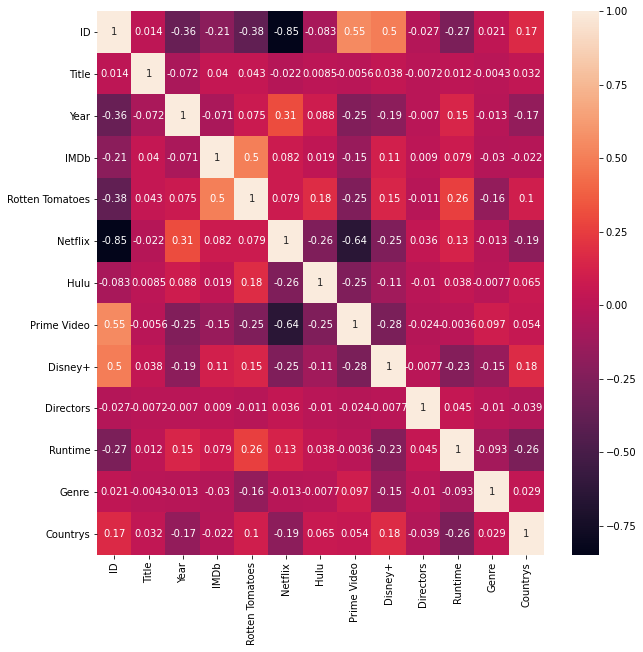

In [109]:
df_corr.drop(columns="Type", inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(), annot= True)